     time   200   160   128  102.4  81.92  65.536  52.4288  41.94304  \
0       5   254   187   138    106     85      66       58        50   
1       6   335   245   195    131    101      74       63        48   
2       7   438   278   239    143    111      90       61        57   
3       8   572   392   284    194    125      87       72        63   
4       9   722   456   363    230    155     111       84        59   
..    ...   ...   ...   ...    ...    ...     ...      ...       ...   
995  1000  6961  6564  5601   4529   4189    3273     2838      2576   
996  1001  7090  6451  5503   4598   4198    3287     2892      2645   
997  1002  7006  6589  5521   4662   4209    3301     2895      2584   
998  1003  6980  6393  5509   4611   4192    3236     2856      2590   
999  1004  7000  6507  5486   4626   4243    3259     2871      2612   

     33.554432  26.8435456  21.47483648  17.17986918  
0           43          40           45           44  
1           51          4

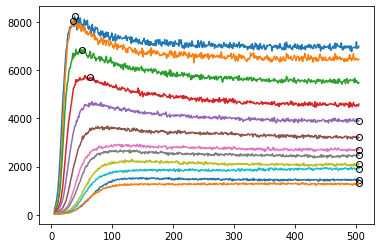

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

whichday='4'

#construct=['D262N']
construct=['D262V']
#construct=['WT']

df=pd.read_table('/project/fava/work/kiersten.ruff/Collaborations/Mittag/2023/ThT_fitting/For_Kiersten/Revised_Eq_Data/Datasets for fitting/Day '+whichday+'/'+construct[0]+'_data.txt')

print(df)

stconcs=list(df.columns.values)
print(len(stconcs))

maxtimebyconc=[]
maxslopebyconc=[]
for i in range(1,len(stconcs)):#1,len(stconcs)):
    print(stconcs[i])
    currthtall=df[stconcs[i]].tolist()
    currtimeall=df['time'].tolist()
    currtime=currtimeall[0:501]
    currtht=currthtall[0:501]
    binsz=10
    getslope=[]
    for j in range(0,len(currtht)-binsz):
        getslope.append((currtht[j+binsz]-currtht[j])/(currtime[j+binsz]-currtime[j]))
    pos = [i for i,x in enumerate(getslope) if x<-20]
    maxslopebyconc.append(max(getslope))
    
    plt.plot(currtime,currtht)
    if pos:
        maxtimebyconc.append(currtime[pos[0]])
        plt.plot(currtime[pos[0]],currtht[pos[0]],'o',color='black',fillstyle='none')

    else:
        maxtimebyconc.append(currtime[j+binsz])
        plt.plot(currtime[j+binsz],currtht[j+binsz],'o',color='black',fillstyle='none')
    
    #print(stconcs[i])
    #print(getslope)
    
print(maxtimebyconc)
print(maxslopebyconc)
#plt.xlim([0,66])

In [2]:
conc=[17.179869184, 21.47483648, 25, 26.8435456, 33.554432, 40, 41.9430, 50, 52.4288, 60, 65.536, 81.92, 100, 102.4, 128, 150, 160, 200]
conc2=[17, 21, 25, 26, 33, 40, 41, 50, 52, 60, 65, 81, 100, 102, 128, 150, 160, 200]

mydays=['1','4','5']
myreps=['1','2','3']
mymarkers=['d','s','o']

print(len(conc))

18


# Paramater by Conc - WT

[-1.4217545163262006, -1.198610965011991, -1.0466169935497294, -0.9754674136977813, -0.7523238623835715, -0.5766133643039939, -0.529181264744133, -0.35346981298978414, -0.3060367597551519, -0.17114825619582946, -0.08289320844094214, 0.14025034287326746, 0.3396773675701612, 0.3633938941874773, 0.5865374455016871, 0.7451424756783255, 0.8096809968158967, 1.0328245481301066]
[[2.37903530e-08 1.91278290e-08            nan 3.27120838e-08
  2.36664082e-08            nan 2.17073282e-09            nan
  5.53556334e-10            nan 5.62108206e-10 2.64429658e-09
             nan 2.15734008e-07 2.96714064e-07            nan
  2.89508788e-05 4.63543111e-06]
 [1.48145314e-08 5.62593635e-09            nan 4.67270959e-09
  8.77324310e-10            nan 3.99420381e-10            nan
  3.99611185e-10            nan 6.34856765e-11 9.62613986e-13
             nan 3.42297069e-08 4.31934893e-08            nan
  6.43594514e-09 6.96444114e-09]
 [           nan            nan 8.17158063e-10            nan
  

/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice
/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: Warning: converting a masked element to nan.
/home/research/kiersten.ruff/.local/lib/python3.7/site-packages/numpy/ma/core.py:3379: UserWarning: Warning: converting a masked element to nan.
  _data[indx] = dval


<ErrorbarContainer object of 3 artists>

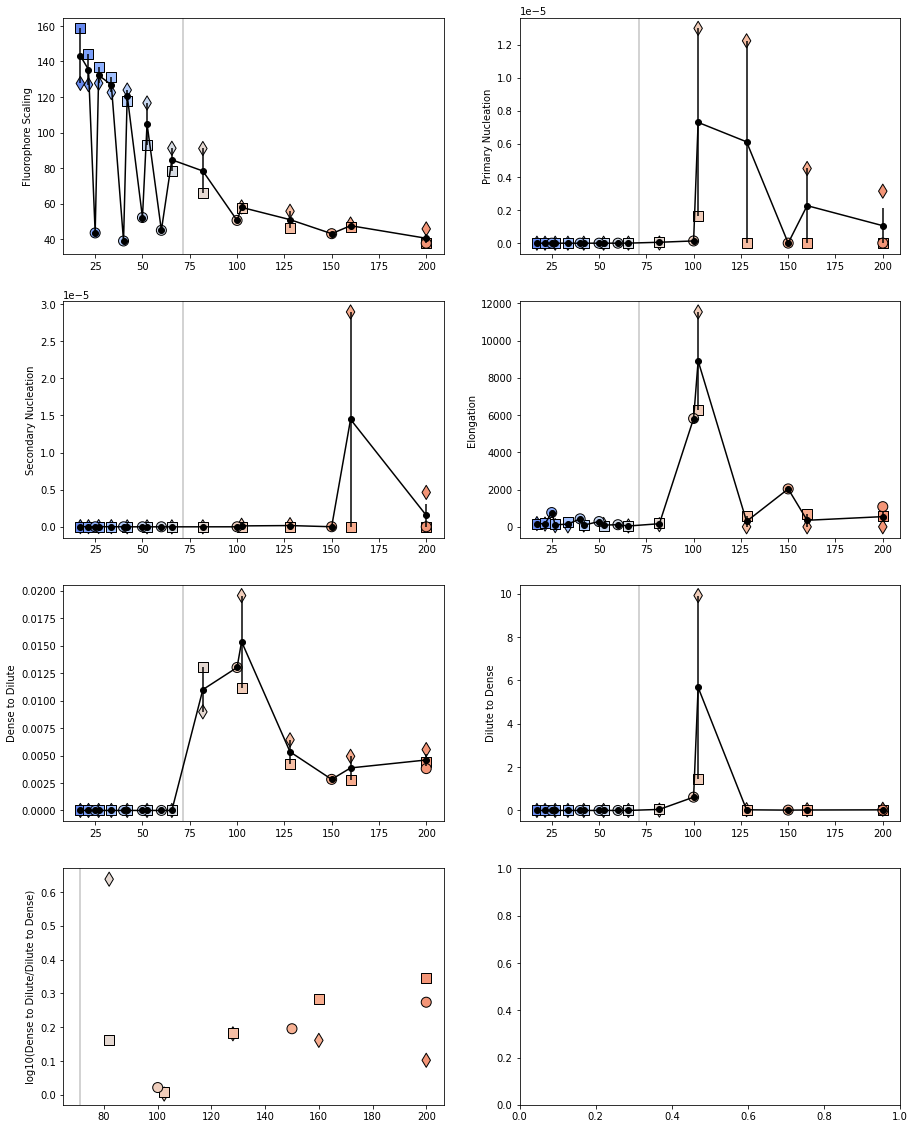

In [9]:
import math
import numpy as np
from scipy import stats
import os.path

csat_wt = 71.2

supersatwt=[]
for c in range(0,len(conc)):
    supersatwt.append(math.log(conc[c]/csat_wt))
    
print(supersatwt)

dendilwt=np.full((len(mydays),len(conc)),np.nan)
dildenwt=np.full((len(mydays),len(conc)),np.nan)
fib1wt=np.full((len(mydays),len(conc)),np.nan)
fib2wt=np.full((len(mydays),len(conc)),np.nan)
fiblongwt=np.full((len(mydays),len(conc)),np.nan)
fscalwt=np.full((len(mydays),len(conc)),np.nan)
ddratwt=np.full((len(mydays),len(conc)),np.nan)

mdendilwt=[]
mdildenwt=[]
mfib1wt=[]
mfib2wt=[]
mfiblongwt=[]
mfscalwt=[]
mddratwt=[]

semdendilwt=[]
semdildenwt=[]
semfib1wt=[]
semfib2wt=[]
semfiblongwt=[]
semfscalwt=[]
semddratwt=[]

wtexcelreplica=[]
wtexcelconc=[]
wtexcelsupersat=[]
wtexcelk1=[]
wtexcelk2=[]
wtexcelklong=[]
wtexcelkdilden=[]
wtexcelkdendil=[]
wtexcelratio=[]
wtexcelscal=[]

for c in range(0,len(conc2)):
    for d in range(0,len(mydays)):
        if os.path.isfile('best_guess_WT_'+str(conc2[c])+'_Day_'+mydays[d]+'.txt'):
            with open('best_guess_WT_'+str(conc2[c])+'_Day_'+mydays[d]+'.txt') as myfile:
                for line in myfile:
                    line = line.strip()
                    line = line.split(",")
                    dendilwt[d,c]=(float(line[0]))
                    dildenwt[d,c]=(float(line[1]))
                    fib1wt[d,c]=(float(line[2]))
                    fib2wt[d,c]=(float(line[3]))
                    fiblongwt[d,c]=(float(line[4]))
                    fscalwt[d,c]=(float(line[10]))
                    if dildenwt[d,c]!=0:
                        ddratwt[d,c]=((dendilwt[d,c]/dildenwt[d,c]))
                        
                    wtexcelreplica.append(myreps[d])
                    wtexcelconc.append(conc[c])
                    wtexcelsupersat.append(supersatwt[c])
                    wtexcelk1.append(fib1wt[d,c])
                    wtexcelk2.append(fib2wt[d,c])
                    wtexcelklong.append(fiblongwt[d,c])
                    wtexcelkdilden.append(dildenwt[d,c])
                    wtexcelkdendil.append(dendilwt[d,c])
                    wtexcelratio.append(ddratwt[d,c])
                    wtexcelscal.append(fscalwt[d,c])
                    

    
    # Mean values
    mdendilwt.append(np.nanmean(dendilwt[:,c]))
    mdildenwt.append(np.nanmean(dildenwt[:,c]))
    mfib1wt.append(np.nanmean(fib1wt[:,c]))
    mfib2wt.append(np.nanmean(fib2wt[:,c]))
    mfiblongwt.append(np.nanmean(fiblongwt[:,c]))
    mfscalwt.append(np.nanmean(fscalwt[:,c]))
    mddratwt.append(np.nanmean(ddratwt[:,c]))
    
    # SEM values
    semdendilwt.append(stats.sem(dendilwt[:,c],nan_policy='omit'))
    semdildenwt.append(stats.sem(dildenwt[:,c],nan_policy='omit'))
    semfib1wt.append(stats.sem(fib1wt[:,c],nan_policy='omit'))
    semfib2wt.append(stats.sem(fib2wt[:,c],nan_policy='omit'))
    semfiblongwt.append(stats.sem(fiblongwt[:,c],nan_policy='omit'))
    semfscalwt.append(stats.sem(fscalwt[:,c],nan_policy='omit'))
    semddratwt.append(stats.sem(ddratwt[:,c],nan_policy='omit'))

print(fib2wt)
print(mfib2wt)
print(semfib2wt)
print(np.array(mfib2wt)-np.array(semfib2wt))

dfwt=pd.DataFrame()
dfwt['Replica']=wtexcelreplica
dfwt['Concentration']=wtexcelconc
dfwt['Supersaturation']=wtexcelsupersat
dfwt['k1']=wtexcelk1
dfwt['k2']=wtexcelk2
dfwt['klong']=wtexcelklong
dfwt['k_dilden']=wtexcelkdilden
dfwt['k_dendil']=wtexcelkdendil
dfwt['ratio']=wtexcelratio
dfwt['fluor scal']=wtexcelscal

print(dfwt)
#with pd.ExcelWriter('../Kiersten_Final_Figure_Data/Figure4.xlsx') as writer:  
#    dfwt.to_excel(writer, sheet_name='WT_ThT_Fits')
#dfwt.to_excel('../Kiersten_Final_Figure_Data/Figure4.xlsx', sheet_name='WT_ThT_Fits')

msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

for d in range(0,len(mydays)):
    #axs[0,0].plot(conc,fscalwt,'o',markersize=msize)
    axs[0,0].scatter(conc, fscalwt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,0].axvline(x=csat_wt,color='lightgrey')
    axs[0,0].set_ylabel('Fluorophore Scaling')

    #axs[0,1].plot(conc,fib1wt,'o',markersize=msize)
    axs[0,1].scatter(conc, fib1wt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,1].axvline(x=csat_wt,color='lightgrey')
    axs[0,1].set_ylabel('Primary Nucleation')

    #axs[1,0].plot(conc,fib2wt,'o',markersize=msize)
    axs[1,0].scatter(conc, fib2wt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,0].axvline(x=csat_wt,color='lightgrey')
    axs[1,0].set_ylabel('Secondary Nucleation')

    #axs[1,1].plot(conc,fiblongwt,'o',markersize=msize)
    axs[1,1].scatter(conc, fiblongwt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,1].axvline(x=csat_wt,color='lightgrey')
    axs[1,1].set_ylabel('Elongation')

    #axs[2,0].plot(conc,dendilwt,'o',markersize=msize)
    axs[2,0].scatter(conc, dendilwt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,0].axvline(x=csat_wt,color='lightgrey')
    axs[2,0].set_ylabel('Dense to Dilute')

    #axs[2,1].plot(conc,dildenwt,'o',markersize=msize)
    axs[2,1].scatter(conc, dildenwt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,1].axvline(x=csat_wt,color='lightgrey')
    axs[2,1].set_ylabel('Dilute to Dense')

    #axs[3,0].plot(conc,ddratwt,'o',markersize=msize)
    axs[3,0].scatter(conc, ddratwt[d,:], s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[3,0].axvline(x=csat_wt,color='lightgrey')
    axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

axs[0,0].errorbar(conc,mfscalwt,semfscalwt,marker='o',color='k')
axs[0,1].errorbar(conc,mfib1wt,semfib1wt,marker='o',color='k')
axs[1,0].errorbar(conc,mfib2wt,semfib2wt,marker='o',color='k')
axs[1,1].errorbar(conc,mfiblongwt,semfiblongwt,marker='o',color='k')
axs[2,0].errorbar(conc,mdendilwt,semdendilwt,marker='o',color='k')
axs[2,1].errorbar(conc,mdildenwt,semdildenwt,marker='o',color='k')
#axs[3,0].errorbar(conc,mddratwt,semddratwt,marker='o',color='k')

#plt.savefig('WT_Day_2_fitted_parameters_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 


# Parameter by Concentration D262V

[-1.9046660519822698, -1.68152250066806, -1.5295285292057985, -1.4583789493538504, -1.2352353980396407, -1.059524899960063, -1.012092800400202, -0.8363813486458532, -0.788948295411221, -0.6540597918518987, -0.5658047440970114, -0.3426611927828015, -0.14323416808590794, -0.11951764146859183, 0.10362590984561795, 0.2622309400222565, 0.32676946115982763, 0.5499130124740373]
[[1.64043903e-08 1.35869261e-08            nan 6.77029898e-09
  5.20049127e-09            nan 1.08856749e-08            nan
  1.23474465e-08            nan 7.34086988e-09 1.42776781e-08
             nan 2.07865013e-08 7.41733024e-08            nan
  2.43277139e-08 1.77172521e-08]
 [7.92366915e-09 9.49027720e-09            nan 3.96997493e-09
  4.58029200e-09            nan 4.88411976e-09            nan
  3.62880100e-09            nan 3.44268167e-09 1.82213671e-09
             nan 1.82189112e-09 2.31236694e-09            nan
  1.11370199e-09 2.24656412e-10]
 [           nan            nan 5.74938118e-10            nan
  

/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: UserWarning: Warning: converting a masked element to nan.
/home/research/kiersten.ruff/.local/lib/python3.7/site-packages/numpy/ma/core.py:3379: UserWarning: Warning: converting a masked element to nan.
  _data[indx] = dval


<ErrorbarContainer object of 3 artists>

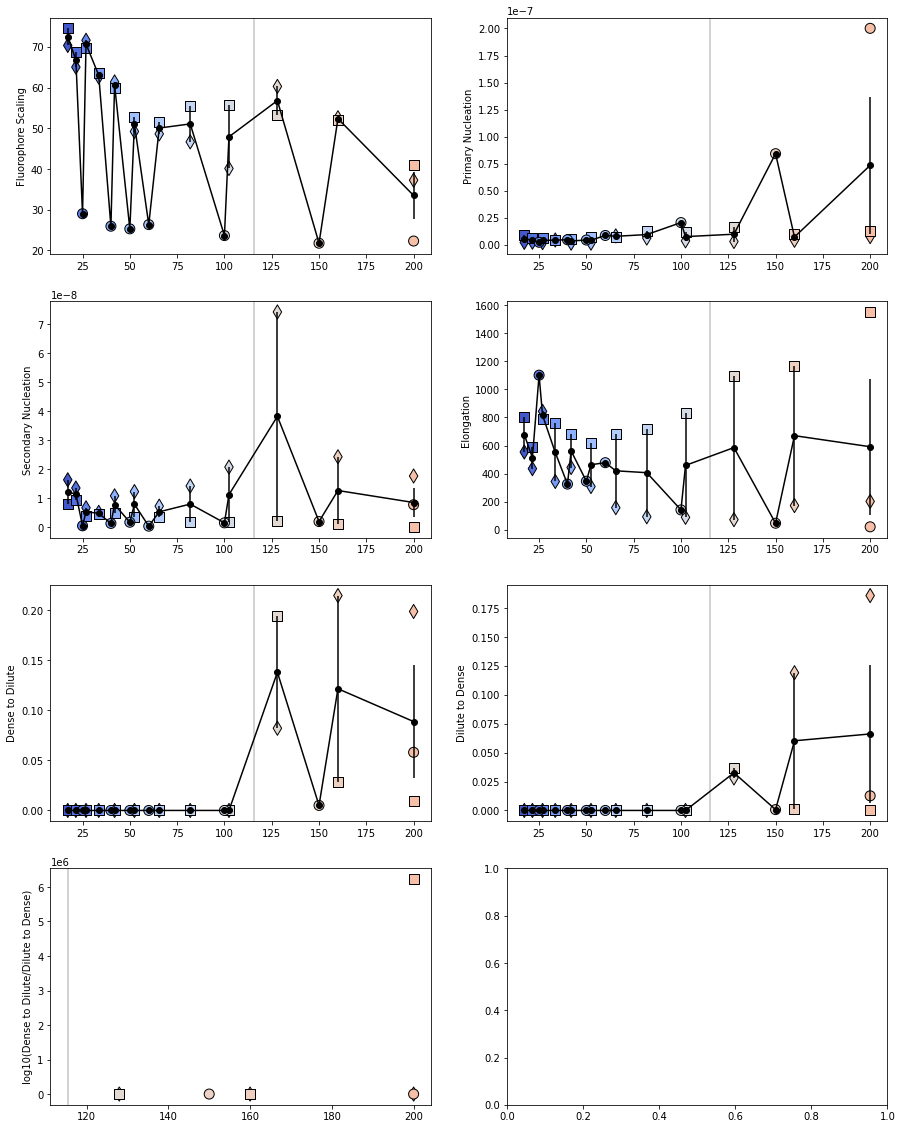

In [10]:
import math

csat_d262v = 115.4

supersatd262v=[]
for c in range(0,len(conc)):
    supersatd262v.append(math.log(conc[c]/csat_d262v))
    
print(supersatd262v)


dendild262v=np.full((len(mydays),len(conc)),np.nan)
dildend262v=np.full((len(mydays),len(conc)),np.nan)
fib1d262v=np.full((len(mydays),len(conc)),np.nan)
fib2d262v=np.full((len(mydays),len(conc)),np.nan)
fiblongd262v=np.full((len(mydays),len(conc)),np.nan)
fscald262v=np.full((len(mydays),len(conc)),np.nan)
ddratd262v=np.full((len(mydays),len(conc)),np.nan)

mdendild262v=[]
mdildend262v=[]
mfib1d262v=[]
mfib2d262v=[]
mfiblongd262v=[]
mfscald262v=[]
mddratd262v=[]

semdendild262v=[]
semdildend262v=[]
semfib1d262v=[]
semfib2d262v=[]
semfiblongd262v=[]
semfscald262v=[]
semddratd262v=[]

d262vexcelreplica=[]
d262vexcelconc=[]
d262vexcelsupersat=[]
d262vexcelk1=[]
d262vexcelk2=[]
d262vexcelklong=[]
d262vexcelkdilden=[]
d262vexcelkdendil=[]
d262vexcelratio=[]
d262vexcelscal=[]


for c in range(0,len(conc2)):
    for d in range(0,len(mydays)):
        if os.path.isfile('best_guess_D262V_'+str(conc2[c])+'_Day_'+mydays[d]+'.txt'):
            with open('best_guess_D262V_'+str(conc2[c])+'_Day_'+mydays[d]+'.txt') as myfile:
                for line in myfile:
                    line = line.strip()
                    line = line.split(",")
                    dendild262v[d,c]=(float(line[0]))
                    dildend262v[d,c]=(float(line[1]))
                    fib1d262v[d,c]=(float(line[2]))
                    fib2d262v[d,c]=(float(line[3]))
                    fiblongd262v[d,c]=(float(line[4]))
                    fscald262v[d,c]=(float(line[10]))
                    if dildend262v[d,c]!=0:
                        ddratd262v[d,c]=((dendild262v[d,c]/dildend262v[d,c]))
                        
                    d262vexcelreplica.append(myreps[d])
                    d262vexcelconc.append(conc[c])
                    d262vexcelsupersat.append(supersatd262v[c])
                    d262vexcelk1.append(fib1d262v[d,c])
                    d262vexcelk2.append(fib2d262v[d,c])
                    d262vexcelklong.append(fiblongd262v[d,c])
                    d262vexcelkdilden.append(dildend262v[d,c])
                    d262vexcelkdendil.append(dendild262v[d,c])
                    d262vexcelratio.append(ddratd262v[d,c])
                    d262vexcelscal.append(fscald262v[d,c])

    
    # Mean values
    mdendild262v.append(np.nanmean(dendild262v[:,c]))
    mdildend262v.append(np.nanmean(dildend262v[:,c]))
    mfib1d262v.append(np.nanmean(fib1d262v[:,c]))
    mfib2d262v.append(np.nanmean(fib2d262v[:,c]))
    mfiblongd262v.append(np.nanmean(fiblongd262v[:,c]))
    mfscald262v.append(np.nanmean(fscald262v[:,c]))
    mddratd262v.append(np.nanmean(ddratd262v[:,c]))
    
    # SEM values
    semdendild262v.append(stats.sem(dendild262v[:,c],nan_policy='omit'))
    semdildend262v.append(stats.sem(dildend262v[:,c],nan_policy='omit'))
    semfib1d262v.append(stats.sem(fib1d262v[:,c],nan_policy='omit'))
    semfib2d262v.append(stats.sem(fib2d262v[:,c],nan_policy='omit'))
    semfiblongd262v.append(stats.sem(fiblongd262v[:,c],nan_policy='omit'))
    semfscald262v.append(stats.sem(fscald262v[:,c],nan_policy='omit'))
    semddratd262v.append(stats.sem(ddratd262v[:,c],nan_policy='omit'))

print(fib2d262v)
print(mfib2d262v)
print(semfib2d262v)
print(np.array(mfib2d262v)-np.array(semfib2d262v))
print(dendild262v)
print(dildend262v)

dfd262v=pd.DataFrame()
dfd262v['Replica']=d262vexcelreplica
dfd262v['Concentration']=d262vexcelconc
dfd262v['Supersaturation']=d262vexcelsupersat
dfd262v['k1']=d262vexcelk1
dfd262v['k2']=d262vexcelk2
dfd262v['klong']=d262vexcelklong
dfd262v['k_dilden']=d262vexcelkdilden
dfd262v['k_dendil']=d262vexcelkdendil
dfd262v['ratio']=d262vexcelratio
dfd262v['fluor scal']=d262vexcelscal

print(dfd262v)
#with pd.ExcelWriter('../Kiersten_Final_Figure_Data/Figure4.xlsx') as writer:  
#    dfd262v.to_excel(writer, sheet_name='D262V_ThT_Fits')
#dfd262v.to_excel('../Kiersten_Final_Figure_Data/Figure4.xlsx', sheet_name='D262V_ThT_Fits')


msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
for d in range(0,len(mydays)):
    #axs[0,0].plot(conc,fscald262v,'o',markersize=msize)
    axs[0,0].scatter(conc, fscald262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,0].axvline(x=csat_d262v,color='lightgrey')
    axs[0,0].set_ylabel('Fluorophore Scaling')

    #axs[0,1].plot(conc,fib1d262v,'o',markersize=msize)
    axs[0,1].scatter(conc, fib1d262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,1].axvline(x=csat_d262v,color='lightgrey')
    axs[0,1].set_ylabel('Primary Nucleation')

    #axs[1,0].plot(conc,fib2d262v,'o',markersize=msize)
    axs[1,0].scatter(conc, fib2d262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,0].axvline(x=csat_d262v,color='lightgrey')
    axs[1,0].set_ylabel('Secondary Nucleation')

    #axs[1,1].plot(conc,fiblongd262v,'o',markersize=msize)
    axs[1,1].scatter(conc, fiblongd262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,1].axvline(x=csat_d262v,color='lightgrey')
    axs[1,1].set_ylabel('Elongation')

    #axs[2,0].plot(conc,dendild262v,'o',markersize=msize)
    axs[2,0].scatter(conc, dendild262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,0].axvline(x=csat_d262v,color='lightgrey')
    axs[2,0].set_ylabel('Dense to Dilute')

    #axs[2,1].plot(conc,dildend262v,'o',markersize=msize)
    axs[2,1].scatter(conc, dildend262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,1].axvline(x=csat_d262v,color='lightgrey')
    axs[2,1].set_ylabel('Dilute to Dense')

    #axs[3,0].plot(conc,ddratd262v,'o',markersize=msize)
    axs[3,0].scatter(conc, ddratd262v[d,:], s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[3,0].axvline(x=csat_d262v,color='lightgrey')
    axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

axs[0,0].errorbar(conc,mfscald262v,semfscald262v,marker='o',color='k')
axs[0,1].errorbar(conc,mfib1d262v,semfib1d262v,marker='o',color='k')
axs[1,0].errorbar(conc,mfib2d262v,semfib2d262v,marker='o',color='k')
axs[1,1].errorbar(conc,mfiblongd262v,semfiblongd262v,marker='o',color='k')
axs[2,0].errorbar(conc,mdendild262v,semdendild262v,marker='o',color='k')
axs[2,1].errorbar(conc,mdildend262v,semdildend262v,marker='o',color='k')
#axs[3,0].errorbar(conc,mddratd262v,semddratd262v,marker='o',color='k')

#plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
#plt.rcParams['ps.fonttype'] = 42
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('D262V_Day_2_fitted_parameters_500_max.pdf', transparent=True, bbox_inches = "tight") 


# Parameter by Concentration D262N

[-1.9537037715434846, -1.730560220229275, -1.5785662487670133, -1.5074166689150654, -1.2842731176008555, -1.1085626195212779, -1.061130519961417, -0.8854190682070681, -0.8379860149724359, -0.7030975114131134, -0.6148424636582263, -0.39169891234401644, -0.19227188764712272, -0.16855536102980664, 0.054588190284402996, 0.21319322046104167, 0.27773174159861286, 0.5008752929128226]
[[2.28945597e-08 3.55164645e-08            nan 4.61503781e-08
  2.85300715e-08            nan 3.50934186e-08            nan
  5.06205945e-08            nan 6.38168135e-08 2.43067007e-08
             nan 3.03202756e-08 7.51942005e-09            nan
  1.94098229e-08 4.41445435e-09]
 [1.01318363e-08 1.07725336e-08            nan 1.75913927e-08
  3.99713611e-09            nan 4.15362980e-09            nan
  4.80074328e-09            nan 5.12260473e-09 2.20286888e-09
             nan 3.15204911e-09 1.93102964e-08            nan
  1.19884871e-08 1.75562835e-09]
 [           nan            nan 2.52508513e-09            

/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: UserWarning: Warning: converting a masked element to nan.
/home/research/kiersten.ruff/.local/lib/python3.7/site-packages/numpy/ma/core.py:3379: UserWarning: Warning: converting a masked element to nan.
  _data[indx] = dval


<ErrorbarContainer object of 3 artists>

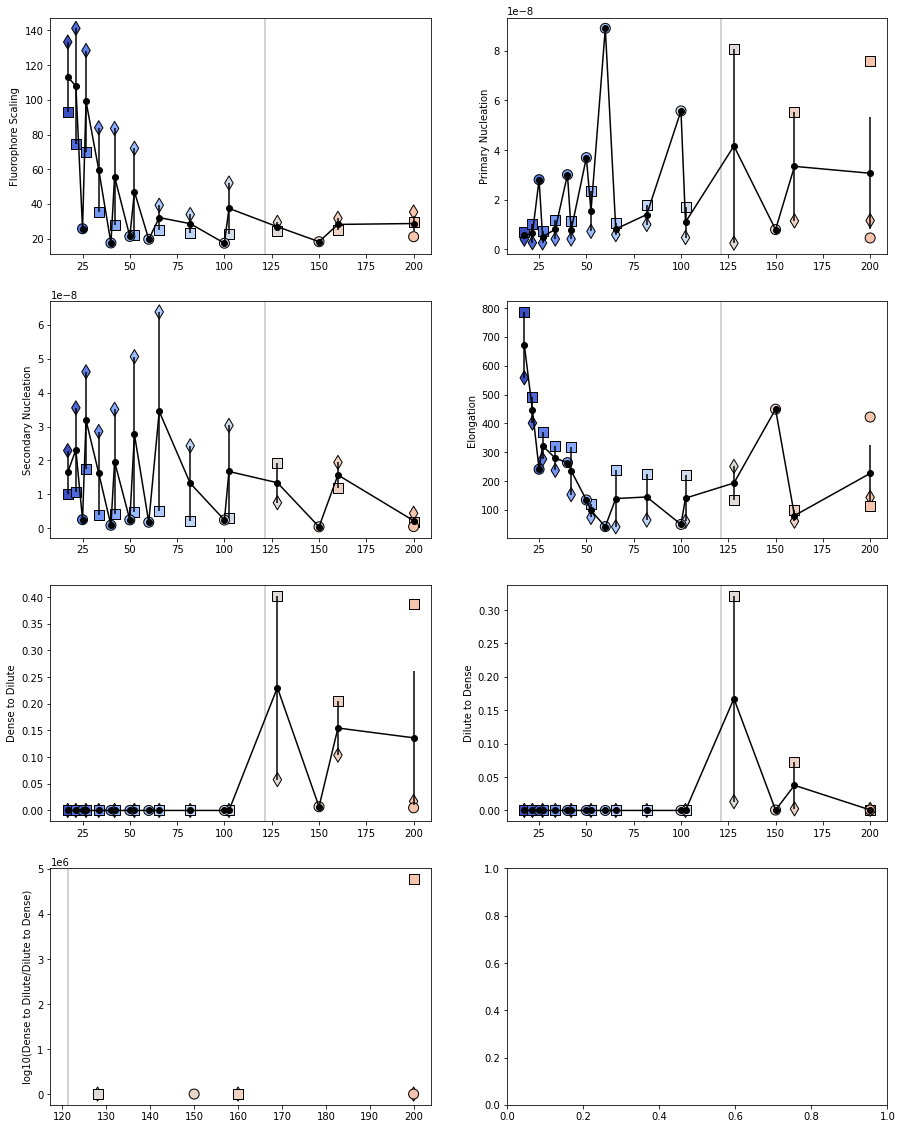

In [11]:
import math

csat_d262n = 121.2


supersatd262n=[]
for c in range(0,len(conc)):
    supersatd262n.append(math.log(conc[c]/csat_d262n))
    
print(supersatd262n)

dendild262n=np.full((len(mydays),len(conc)),np.nan)
dildend262n=np.full((len(mydays),len(conc)),np.nan)
fib1d262n=np.full((len(mydays),len(conc)),np.nan)
fib2d262n=np.full((len(mydays),len(conc)),np.nan)
fiblongd262n=np.full((len(mydays),len(conc)),np.nan)
fscald262n=np.full((len(mydays),len(conc)),np.nan)
ddratd262n=np.full((len(mydays),len(conc)),np.nan)

mdendild262n=[]
mdildend262n=[]
mfib1d262n=[]
mfib2d262n=[]
mfiblongd262n=[]
mfscald262n=[]
mddratd262n=[]

semdendild262n=[]
semdildend262n=[]
semfib1d262n=[]
semfib2d262n=[]
semfiblongd262n=[]
semfscald262n=[]
semddratd262n=[]

d262nexcelreplica=[]
d262nexcelconc=[]
d262nexcelsupersat=[]
d262nexcelk1=[]
d262nexcelk2=[]
d262nexcelklong=[]
d262nexcelkdilden=[]
d262nexcelkdendil=[]
d262nexcelratio=[]
d262nexcelscal=[]


for c in range(0,len(conc2)):
    for d in range(0,len(mydays)):
        if os.path.isfile('best_guess_D262N_'+str(conc2[c])+'_Day_'+mydays[d]+'.txt'):
            with open('best_guess_D262N_'+str(conc2[c])+'_Day_'+mydays[d]+'.txt') as myfile:
                for line in myfile:
                    line = line.strip()
                    line = line.split(",")
                    dendild262n[d,c]=(float(line[0]))
                    dildend262n[d,c]=(float(line[1]))
                    fib1d262n[d,c]=(float(line[2]))
                    fib2d262n[d,c]=(float(line[3]))
                    fiblongd262n[d,c]=(float(line[4]))
                    fscald262n[d,c]=(float(line[10]))
                    if dildend262n[d,c]!=0:
                        ddratd262n[d,c]=((dendild262n[d,c]/dildend262n[d,c]))
                    #else:
                    #    ddratd262n[d,c]=(math.log10(1))
                    
                    d262nexcelreplica.append(myreps[d])
                    d262nexcelconc.append(conc[c])
                    d262nexcelsupersat.append(supersatd262n[c])
                    d262nexcelk1.append(fib1d262n[d,c])
                    d262nexcelk2.append(fib2d262n[d,c])
                    d262nexcelklong.append(fiblongd262n[d,c])
                    d262nexcelkdilden.append(dildend262n[d,c])
                    d262nexcelkdendil.append(dendild262n[d,c])
                    d262nexcelratio.append(ddratd262n[d,c])
                    d262nexcelscal.append(fscald262n[d,c])
    
    # Mean values
    mdendild262n.append(np.nanmean(dendild262n[:,c]))
    mdildend262n.append(np.nanmean(dildend262n[:,c]))
    mfib1d262n.append(np.nanmean(fib1d262n[:,c]))
    mfib2d262n.append(np.nanmean(fib2d262n[:,c]))
    mfiblongd262n.append(np.nanmean(fiblongd262n[:,c]))
    mfscald262n.append(np.nanmean(fscald262n[:,c]))
    mddratd262n.append(np.nanmean(ddratd262n[:,c]))
    
    # SEM values
    semdendild262n.append(stats.sem(dendild262n[:,c],nan_policy='omit'))
    semdildend262n.append(stats.sem(dildend262n[:,c],nan_policy='omit'))
    semfib1d262n.append(stats.sem(fib1d262n[:,c],nan_policy='omit'))
    semfib2d262n.append(stats.sem(fib2d262n[:,c],nan_policy='omit'))
    semfiblongd262n.append(stats.sem(fiblongd262n[:,c],nan_policy='omit'))
    semfscald262n.append(stats.sem(fscald262n[:,c],nan_policy='omit'))
    semddratd262n.append(stats.sem(ddratd262n[:,c],nan_policy='omit'))

print(fib2d262n)
print(mfib2d262n)
print(semfib2d262n)
print(np.array(mfib2d262n)-np.array(semfib2d262n))
print(dendild262n)
print(dildend262n)

dfd262n=pd.DataFrame()
dfd262n['Replica']=d262nexcelreplica
dfd262n['Concentration']=d262nexcelconc
dfd262n['Supersaturation']=d262nexcelsupersat
dfd262n['k1']=d262nexcelk1
dfd262n['k2']=d262nexcelk2
dfd262n['klong']=d262nexcelklong
dfd262n['k_dilden']=d262nexcelkdilden
dfd262n['k_dendil']=d262nexcelkdendil
dfd262n['ratio']=d262nexcelratio
dfd262n['fluor scal']=d262nexcelscal

print(dfd262n)
#with pd.ExcelWriter('../Kiersten_Final_Figure_Data/Figure4.xlsx') as writer:  
#    dfd262n.to_excel(writer, sheet_name='D262N_ThT_Fits')
#dfd262n.to_excel('../Kiersten_Final_Figure_Data/Figure4.xlsx', sheet_name='D262N_ThT_Fits')


msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
for d in range(0,len(mydays)):
    #axs[0,0].plot(conc,fscald262n,'o',markersize=msize)
    axs[0,0].scatter(conc, fscald262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,0].axvline(x=csat_d262n,color='lightgrey')
    axs[0,0].set_ylabel('Fluorophore Scaling')

    #axs[0,1].plot(conc,fib1d262n,'o',markersize=msize)
    axs[0,1].scatter(conc, fib1d262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[0,1].axvline(x=csat_d262n,color='lightgrey')
    axs[0,1].set_ylabel('Primary Nucleation')

    #axs[1,0].plot(conc,fib2d262n,'o',markersize=msize)
    axs[1,0].scatter(conc, fib2d262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,0].axvline(x=csat_d262n,color='lightgrey')
    axs[1,0].set_ylabel('Secondary Nucleation')

    #axs[1,1].plot(conc,fiblongd262n,'o',markersize=msize)
    axs[1,1].scatter(conc, fiblongd262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[1,1].axvline(x=csat_d262n,color='lightgrey')
    axs[1,1].set_ylabel('Elongation')

    #axs[2,0].plot(conc,dendild262n,'o',markersize=msize)
    axs[2,0].scatter(conc, dendild262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,0].axvline(x=csat_d262n,color='lightgrey')
    axs[2,0].set_ylabel('Dense to Dilute')

    #axs[2,1].plot(conc,dildend262n,'o',markersize=msize)
    axs[2,1].scatter(conc, dildend262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[2,1].axvline(x=csat_d262n,color='lightgrey')
    axs[2,1].set_ylabel('Dilute to Dense')

    #axs[3,0].plot(conc,ddratd262n,'o',markersize=msize)
    axs[3,0].scatter(conc, ddratd262n[d,:], s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker=mymarkers[d])
    axs[3,0].axvline(x=csat_d262n,color='lightgrey')
    axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

axs[0,0].errorbar(conc,mfscald262n,semfscald262n,marker='o',color='k')
axs[0,1].errorbar(conc,mfib1d262n,semfib1d262n,marker='o',color='k')
axs[1,0].errorbar(conc,mfib2d262n,semfib2d262n,marker='o',color='k')
axs[1,1].errorbar(conc,mfiblongd262n,semfiblongd262n,marker='o',color='k')
axs[2,0].errorbar(conc,mdendild262n,semdendild262n,marker='o',color='k')
axs[2,1].errorbar(conc,mdildend262n,semdildend262n,marker='o',color='k')
#axs[3,0].errorbar(conc,mddratd262n,semddratd262n,marker='o',color='k')

#plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
#plt.rcParams['ps.fonttype'] = 42
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('D262N_Day_2_fitted_parameters_500_max.pdf', transparent=True, bbox_inches = "tight") 


# 4 Panel row of data of fit values for manuscript - with each day

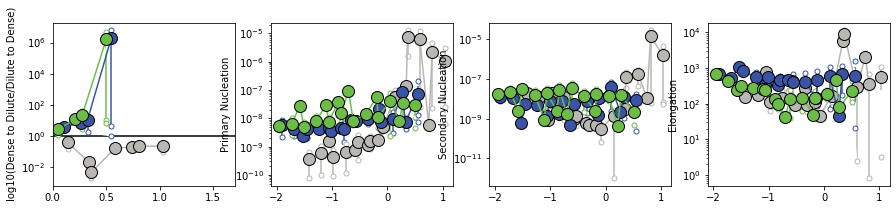

In [6]:
import numpy as np

#conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]


fig, axs = plt.subplots(1, 4, figsize=(15, 3))

axs[1].errorbar(supersatwt, mfib1wt, semfib1wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1].errorbar(supersatd262v, mfib1d262v, semfib1d262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[1].errorbar(supersatd262n, mfib1d262n, semfib1d262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[1].set_ylabel('Primary Nucleation')
axs[1].set_yscale('log')#,nonpositive='clip')
#axs[1].set_ylim([0, 7*10**-9])

axs[2].errorbar(supersatwt, mfib2wt, semfib2wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[2].errorbar(supersatd262v, mfib2d262v, semfib2d262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[2].errorbar(supersatd262n, mfib2d262n, semfib2d262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[2].set_ylabel('Secondary Nucleation')
axs[2].set_yscale('log')#,nonpositive='clip')
#axs[2].set_ylim([0, 7*10**-9])

axs[3].errorbar(supersatwt, mfiblongwt, semfiblongwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[3].errorbar(supersatd262v, mfiblongd262v, semfiblongd262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[3].errorbar(supersatd262n, mfiblongd262n, semfiblongd262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[3].set_ylabel('Elongation')
axs[3].set_yscale('log')#,nonpositive='clip')
#axs[3,0].set_ylim([0, 7*10**-9])

axs[0].errorbar(supersatwt[11:18], mddratwt[11:18], semddratwt[11:18], marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[0].errorbar(supersatd262v[14:18], mddratd262v[14:18], semddratd262v[14:18], marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[0].errorbar(supersatd262n[14:18], mddratd262n[14:18], semddratd262n[14:18], marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')
axs[0].set_yscale('log')#,nonpositive='clip')
axs[0].axhline(y=1,color='black')
axs[0].set_xlim([0, 1.7])

currmarker='o'
currmarkersize=5

for d in range(0,len(mydays)):
    axs[0].plot(supersatwt, ddratwt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[0].plot(supersatd262v, ddratd262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[0].plot(supersatd262n, ddratd262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')

    axs[1].plot(supersatwt, fib1wt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[1].plot(supersatd262v, fib1d262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[1].plot(supersatd262n, fib1d262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')

    axs[2].plot(supersatwt, fib2wt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[2].plot(supersatd262v, fib2d262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[2].plot(supersatd262n, fib2d262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')

    axs[3].plot(supersatwt, fiblongwt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[3].plot(supersatd262v, fiblongd262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[3].plot(supersatd262n, fiblongd262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')
    
    
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('Mean_all_constructs_Day_2_fitted_parameters_rat_fib1_fib2_elong_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 


[ 17.17986918  21.47483648  26.8435456   33.554432    41.943
  52.4288      65.536       81.92       102.4        128.
 160.         200.        ]


/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Warning: converting a masked element to nan.
  
/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Warning: converting a masked element to nan.
  from ipykernel import kernelapp as app
/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


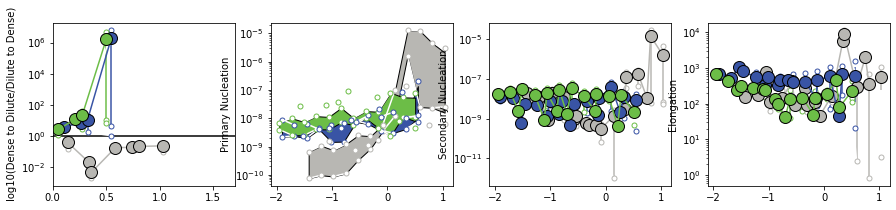

In [7]:
import numpy as np

#conc=[17.179869184, 21.47483648, 25, 26.8435456, 33.554432, 40, 41.9430, 50, 52.4288, 60, 65.536, 81.92, 100, 102.4, 128, 150, 160, 200]


fig, axs = plt.subplots(1, 4, figsize=(15, 3))

whichvals=[0,1,3,4,6,8,10,11,13,14,16,17]
tmpconc=np.array(conc)[whichvals]
print(tmpconc)
#print(conc[whichvals])


axs[1].fill_between(np.array(supersatwt)[whichvals], np.array(mfib1wt)[whichvals]-np.array(semfib1wt)[whichvals], np.array(mfib1wt)[whichvals]+np.array(semfib1wt)[whichvals], facecolor='#b8b7b3',edgecolor='black')
axs[1].fill_between(np.array(supersatd262v)[whichvals], np.array(mfib1d262v)[whichvals]-np.array(semfib1d262v)[whichvals],np.array(mfib1d262v)[whichvals]+np.array(semfib1d262v)[whichvals], facecolor='#3954a5',edgecolor='black')
axs[1].fill_between(np.array(supersatd262n)[whichvals], np.array(mfib1d262n)[whichvals]-np.array(semfib1d262n)[whichvals], np.array(mfib1d262n)[whichvals]+np.array(semfib1d262n)[whichvals], facecolor='#6cbd47',edgecolor='black')
axs[1].set_ylabel('Primary Nucleation')
axs[1].set_yscale('log')#,nonpositive='clip')
#axs[1].set_ylim([0, 7*10**-9])

axs[2].errorbar(supersatwt, mfib2wt, semfib2wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[2].errorbar(supersatd262v, mfib2d262v, semfib2d262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[2].errorbar(supersatd262n, mfib2d262n, semfib2d262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[2].set_ylabel('Secondary Nucleation')
axs[2].set_yscale('log')#,nonpositive='clip')
#axs[2].set_ylim([0, 7*10**-9])

axs[3].errorbar(supersatwt, mfiblongwt, semfiblongwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[3].errorbar(supersatd262v, mfiblongd262v, semfiblongd262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[3].errorbar(supersatd262n, mfiblongd262n, semfiblongd262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[3].set_ylabel('Elongation')
axs[3].set_yscale('log')#,nonpositive='clip')
#axs[3,0].set_ylim([0, 7*10**-9])

axs[0].errorbar(supersatwt[11:18], mddratwt[11:18], semddratwt[11:18], marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[0].errorbar(supersatd262v[14:18], mddratd262v[14:18], semddratd262v[14:18], marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
axs[0].errorbar(supersatd262n[14:18], mddratd262n[14:18], semddratd262n[14:18], marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')
axs[0].set_yscale('log')#,nonpositive='clip')
axs[0].axhline(y=1,color='black')
axs[0].set_xlim([0, 1.7])

currmarker='o'
currmarkersize=5

for d in range(0,len(mydays)):
    axs[0].plot(supersatwt, ddratwt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[0].plot(supersatd262v, ddratd262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[0].plot(supersatd262n, ddratd262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')

    axs[1].plot(supersatwt, fib1wt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[1].plot(supersatd262v, fib1d262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[1].plot(supersatd262n, fib1d262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')

    axs[2].plot(supersatwt, fib2wt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[2].plot(supersatd262v, fib2d262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[2].plot(supersatd262n, fib2d262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')

    axs[3].plot(supersatwt, fiblongwt[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#b8b7b3')
    axs[3].plot(supersatd262v, fiblongd262v[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#3954a5')
    axs[3].plot(supersatd262n, fiblongd262n[d,:], marker=currmarker, color='white',markersize=currmarkersize, markeredgecolor='#6cbd47')
    
    
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('Mean_all_constructs_Day_2_fitted_parameters_rat_fib1_fib2_elong_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 


[ 25.  40.  50.  60. 100. 150. 200.]


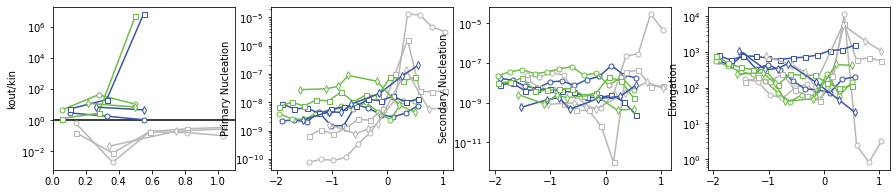

In [8]:
import numpy as np

#conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]


fig, axs = plt.subplots(1, 4, figsize=(15, 3))

#axs[1].errorbar(supersatwt, mfib1wt, semfib1wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
#axs[1].errorbar(supersatd262v, mfib1d262v, semfib1d262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
#axs[1].errorbar(supersatd262n, mfib1d262n, semfib1d262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[1].set_ylabel('Primary Nucleation')
axs[1].set_yscale('log')#,nonpositive='clip')
#axs[1].set_ylim([0, 7*10**-9])

#axs[2].errorbar(supersatwt, mfib2wt, semfib2wt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
#axs[2].errorbar(supersatd262v, mfib2d262v, semfib2d262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
#axs[2].errorbar(supersatd262n, mfib2d262n, semfib2d262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[2].set_ylabel('Secondary Nucleation')
axs[2].set_yscale('log')#,nonpositive='clip')
#axs[2].set_ylim([0, 7*10**-9])

#axs[3].errorbar(supersatwt, mfiblongwt, semfiblongwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
#axs[3].errorbar(supersatd262v, mfiblongd262v, semfiblongd262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
#axs[3].errorbar(supersatd262n, mfiblongd262n, semfiblongd262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[3].set_ylabel('Elongation')
axs[3].set_yscale('log')#,nonpositive='clip')
#axs[3,0].set_ylim([0, 7*10**-9])

#axs[0].errorbar(supersatwt, mddratwt, semddratwt, marker='o', color='#b8b7b3',markersize=12, markeredgecolor='black')
#axs[0].errorbar(supersatd262v, mddratd262v, semddratd262v, marker='o', color='#3954a5',markersize=12, markeredgecolor='black')
#axs[0].errorbar(supersatd262n, mddratd262n, semddratd262n, marker='o', color='#6cbd47',markersize=12, markeredgecolor='black')
axs[0].set_ylabel('kout/kin')
axs[0].set_yscale('log')#,nonpositive='clip')
axs[0].axhline(y=1,color='black')
axs[0].set_xlim([0, 1.7])

currmarker=['o','s','d']
currmarkersize=5

whichvals=[0,1,3,4,6,8,10,11,13,14,16,17]
for d in [0,1]:
    axs[0].plot(np.array(supersatwt)[whichvals], np.array(ddratwt[d,:])[whichvals], marker=currmarker[d], color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[0].plot(np.array(supersatd262v)[whichvals], np.array(ddratd262v[d,:])[whichvals], marker=currmarker[d], color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[0].plot(np.array(supersatd262n)[whichvals], np.array(ddratd262n[d,:])[whichvals], marker=currmarker[d], color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')

    axs[1].plot(np.array(supersatwt)[whichvals], np.array(fib1wt[d,:])[whichvals], marker=currmarker[d], color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[1].plot(np.array(supersatd262v)[whichvals], np.array(fib1d262v[d,:])[whichvals], marker=currmarker[d], color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[1].plot(np.array(supersatd262n)[whichvals], np.array(fib1d262n[d,:])[whichvals], marker=currmarker[d], color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')

    axs[2].plot(np.array(supersatwt)[whichvals], np.array(fib2wt[d,:])[whichvals], marker=currmarker[d], color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[2].plot(np.array(supersatd262v)[whichvals], np.array(fib2d262v[d,:])[whichvals], marker=currmarker[d], color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[2].plot(np.array(supersatd262n)[whichvals], np.array(fib2d262n[d,:])[whichvals], marker=currmarker[d], color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')

    axs[3].plot(np.array(supersatwt)[whichvals], np.array(fiblongwt[d,:])[whichvals], marker=currmarker[d], color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[3].plot(np.array(supersatd262v)[whichvals], np.array(fiblongd262v[d,:])[whichvals], marker=currmarker[d], color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[3].plot(np.array(supersatd262n)[whichvals], np.array(fiblongd262n[d,:])[whichvals], marker=currmarker[d], color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')

whichvals2=[2,5,7,9,12,15,17]
tmpconc=np.array(conc)[whichvals2]
print(tmpconc)
for d in [2]:
    axs[0].plot(np.array(supersatwt)[whichvals2], np.array(ddratwt[d,:])[whichvals2], marker=currmarker[d], color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[0].plot(np.array(supersatd262v)[whichvals2], np.array(ddratd262v[d,:])[whichvals2], marker=currmarker[d], color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[0].plot(np.array(supersatd262n)[whichvals2], np.array(ddratd262n[d,:])[whichvals2], marker=currmarker[d], color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')

    axs[1].plot(np.array(supersatwt)[whichvals2], np.array(fib1wt[d,:])[whichvals2], marker=currmarker[d], color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[1].plot(np.array(supersatd262v)[whichvals2], np.array(fib1d262v[d,:])[whichvals2], marker=currmarker[d], color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[1].plot(np.array(supersatd262n)[whichvals2], np.array(fib1d262n[d,:])[whichvals2], marker=currmarker[d], color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')

    axs[2].plot(np.array(supersatwt)[whichvals2], np.array(fib2wt[d,:])[whichvals2], marker=currmarker[d], color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[2].plot(np.array(supersatd262v)[whichvals2], np.array(fib2d262v[d,:])[whichvals2], marker=currmarker[d], color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[2].plot(np.array(supersatd262n)[whichvals2], np.array(fib2d262n[d,:])[whichvals2], marker=currmarker[d], color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')

    axs[3].plot(np.array(supersatwt)[whichvals2], np.array(fiblongwt[d,:])[whichvals2], marker=currmarker[d], color='#b8b7b3',markersize=currmarkersize, markeredgecolor='#b8b7b3',markerfacecolor='white')
    axs[3].plot(np.array(supersatd262v)[whichvals2], np.array(fiblongd262v[d,:])[whichvals2], marker=currmarker[d], color='#3954a5',markersize=currmarkersize, markeredgecolor='#3954a5',markerfacecolor='white')
    axs[3].plot(np.array(supersatd262n)[whichvals2], np.array(fiblongd262n[d,:])[whichvals2], marker=currmarker[d], color='#6cbd47',markersize=currmarkersize, markeredgecolor='#6cbd47',markerfacecolor='white')

axs[0].set_xlim([0,1.1])
    
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('All_reps_sample_age_0_500_max_text_files_4_panel_sc_ln.pdf', transparent=True, bbox_inches = "tight") 


# Plot specific fits

[17, 21, 25, 26, 33, 40, 41, 50, 52, 60, 65, 81, 100, 102, 128, 150, 160, 200]
[-1.4217545163262006, -1.198610965011991, -1.0466169935497294, -0.9754674136977813, -0.7523238623835715, -0.5766133643039939, -0.529181264744133, -0.35346981298978414, -0.3060367597551519, -0.17114825619582946, -0.08289320844094214, 0.14025034287326746, 0.3396773675701612, 0.3633938941874773, 0.5865374455016871, 0.7451424756783255, 0.8096809968158967, 1.0328245481301066]
[-1.9046660519822698, -1.68152250066806, -1.5295285292057985, -1.4583789493538504, -1.2352353980396407, -1.059524899960063, -1.012092800400202, -0.8363813486458532, -0.788948295411221, -0.6540597918518987, -0.5658047440970114, -0.3426611927828015, -0.14323416808590794, -0.11951764146859183, 0.10362590984561795, 0.2622309400222565, 0.32676946115982763, 0.5499130124740373]
[-1.9537037715434846, -1.730560220229275, -1.5785662487670133, -1.5074166689150654, -1.2842731176008555, -1.1085626195212779, -1.061130519961417, -0.8854190682070681, -0.837

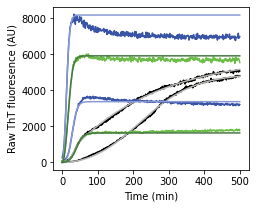

In [14]:
import pandas as pd

# Use similar degrees of supersaturation
datatypebelow=['41_Day_4','65_Day_4','65_Day_4'] #degree of supersaturation: -0.53, -0.57, -0.61
datatypeabove=['128_Day_4','200_Day_4','200_Day_4'] #degree of supersaturation: 0.59, 0.55, 0.50
mycolors=['#000000','#3954a5','#6cbd47']
mycolors2=['#b8b7b3','#8798d6','#477743']
construct=['WT','D262V','D262N']

print(conc2)
print(supersatwt)
print(supersatd262v)
print(supersatd262n)

plt.figure(figsize=(3.5,3))

dfthtfluor=pd.DataFrame()

for c in range(0,len(construct)):
    dfexp=pd.read_table('exp_fibril_'+construct[c]+'_'+datatypebelow[c]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+construct[c]+'_'+datatypebelow[c]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    plt.plot(explist,'-',color=mycolors[c])
    plt.plot(complist,'-',color=mycolors2[c])
    
    dfthtfluor[construct[c]+': '+datatypebelow[c]+' Exp']=explist
    dfthtfluor[construct[c]+': '+datatypebelow[c]+' Fit']=complist
    
    dfexp=pd.read_table('exp_fibril_'+construct[c]+'_'+datatypeabove[c]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+construct[c]+'_'+datatypeabove[c]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    plt.plot(explist,'-',color=mycolors[c])
    plt.plot(complist,'-',color=mycolors2[c])
    
    dfthtfluor[construct[c]+': '+datatypeabove[c]+' Exp']=explist
    dfthtfluor[construct[c]+': '+datatypeabove[c]+' Fit']=complist

#plt.xlim([0, 350])
plt.ylabel('Raw ThT fluoresence (AU)')
plt.xlabel('Time (min)')

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('All_constructs_Day_4_plot_fits_08_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 

print(dfthtfluor)

# Write data to excel file

In [15]:
with pd.ExcelWriter('../Kiersten_Final_Figure_Data/Figure4_B_F.xlsx') as writer: 
    dfthtfluor.to_excel(writer, sheet_name='Fig4B_Example_Fits')
    dfwt.to_excel(writer, sheet_name='Fig4C-F_WT_ThT_Fits')
    dfd262v.to_excel(writer, sheet_name='Fig4C-F_D262V_ThT_Fits')
    dfd262n.to_excel(writer, sheet_name='Fig4C-F_D262N_ThT_Fits')

# Plot multiple concentrations

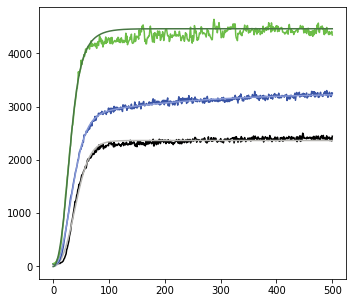

In [10]:
plt.figure(figsize=(5.5,5))

mycolors=['#000000','#3954a5','#6cbd47']
mycolors2=['#b8b7b3','#8798d6','#477743']

daylist=['5']
currconstruct=['D262V']
currconc=['100','150','200']

for d in range(0,len(currconc)):
    dfexp=pd.read_table('exp_fibril_'+currconstruct[0]+'_'+currconc[d]+'_Day_'+daylist[0]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+currconstruct[0]+'_'+currconc[d]+'_Day_'+daylist[0]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    plt.plot(explist,'-',color=mycolors[d])
    plt.plot(complist,'-',color=mycolors2[d])

# Plot multiple days

(0.0, 100.0)

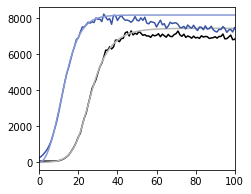

In [22]:
plt.figure(figsize=(3.5,3))

#daylist=['1','2','4']
daylist=['1','4']
currconstruct=['D262V']
currconc=['200']

for d in range(0,len(daylist)):
    dfexp=pd.read_table('exp_fibril_'+currconstruct[0]+'_'+currconc[0]+'_Day_'+daylist[d]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+currconstruct[0]+'_'+currconc[0]+'_Day_'+daylist[d]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    plt.plot(explist,'-',color=mycolors[d])
    plt.plot(complist,'-',color=mycolors2[d])
    
plt.xlim([0, 100])

# Combine best fit values into single csv file

In [28]:
constructs=['WT','D262V','D262N']
myheader=['Construct','Total Concentration','Day','kdendil','kdilden','k1','k2','klong','fluorscal']

with open('best_guess_full_file.txt','w') as myoutfile:
    # Write header
    for i in range(0,len(myheader)):
        if i < len(myheader)-1:
            myoutfile.write(str(myheader[i])+', ')
        else:
            myoutfile.write(str(myheader[i])+"\n")
            
    for p in range(0,len(constructs)):
        for c in range(0,len(conc2)):
            for d in range(0,len(mydays)):
                if os.path.isfile('best_guess_'+constructs[p]+'_'+str(conc2[c])+'_Day_'+mydays[d]+'.txt'):
                    with open('best_guess_'+constructs[p]+'_'+str(conc2[c])+'_Day_'+mydays[d]+'.txt') as myfile:
                        for line in myfile:
                            line = line.strip()
                            line = line.split(",")
                            validx=[0,1,2,3,4,10]
                            currparams=[]
                            currparams.append(constructs[p])
                            currparams.append(conc2[c])
                            currparams.append(mydays[d])
                            for v in validx:
                                currparams.append(line[v])

                            for i in range(0,len(currparams)):
                                if i < len(currparams)-1:
                                    myoutfile.write(str(currparams[i])+', ')
                                else:
                                    myoutfile.write(str(currparams[i])+"\n")
                            #print(currparams)
                            #hi

In [24]:
test1=[]
test2=[]
for c in range(0,len(conc)):
    test1.append(math.log(conc[c]/csat_d262n))
    test2.append(math.log2(conc[c]/csat_d262n))
    
print(test1)
print(test2)

test1=[]
test2=[]
for c in range(0,len(conc)):
    test1.append(math.log(conc[c]/csat_d262v))
    test2.append(math.log2(conc[c]/csat_d262v))
    
print(test1)
print(test2)

test1=[]
test2=[]
for c in range(0,len(conc)):
    test1.append(math.log(conc[c]/csat_wt))
    test2.append(math.log2(conc[c]/csat_wt))
    
print(test1)
print(test2)

[-1.9537037715434846, -1.730560220229275, -1.5785662487670133, -1.5074166689150654, -1.2842731176008555, -1.1085626195212779, -1.061130519961417, -0.8854190682070681, -0.8379860149724359, -0.7030975114131134, -0.6148424636582263, -0.39169891234401644, -0.19227188764712272, -0.16855536102980664, 0.054588190284402996, 0.21319322046104167, 0.27773174159861286, 0.5008752929128226]
[-2.8185987425718495, -2.4966706476844873, -2.2773896988108637, -2.174742552797125, -1.852814457909763, -1.5993177936982261, -1.5308877388842634, -1.277389698810864, -1.208958268135038, -1.01435529297707, -0.8870301732476757, -0.5651020783603132, -0.2773896988108639, -0.24317398347295088, 0.0787541114144113, 0.3075728019102923, 0.4006822063017738, 0.722610301189136]
[-1.9046660519822698, -1.68152250066806, -1.5295285292057985, -1.4583789493538504, -1.2352353980396407, -1.059524899960063, -1.012092800400202, -0.8363813486458532, -0.788948295411221, -0.6540597918518987, -0.5658047440970114, -0.3426611927828015, -0.

In [5]:
k_dilute_dense = 0.0129
k_dense_dilute = 0.00443

#k_dilute_dense = 0.058
#k_dense_dilute = 0.0126

initial_conc = 200
initial_dilute_protein = initial_conc * k_dense_dilute / (k_dilute_dense + k_dense_dilute)
initial_dense_protein = initial_conc * k_dilute_dense / (k_dilute_dense + k_dense_dilute)

print(initial_dilute_protein)
print(initial_dense_protein)
print(38*60)

51.12521638776688
148.87478361223313
2280
